# 第 2 章：PyTorch

In [1]:
# 导入PyTorch库
import torch
import torchvision

# 查看安装的PyTorch版本
torch.__version__

'1.0.1'

## 张量 Tensor

### 创建 Tensor

创建一个随机初始化的 Tensor

In [2]:
x = torch.randn(2,2)
print(x)

tensor([[-0.3249,  0.4365],
        [ 0.3976, -0.4804]])


直接把 Python 列表构建成 Tensor

In [3]:
x = torch.tensor([[1, 2], [3, 4]])
print(x)

tensor([[1, 2],
        [3, 4]])


创建一个全零 Tensor

In [4]:
x = torch.zeros(2,2)
print(x)

tensor([[0., 0.],
        [0., 0.]])


基于现有的 Tensor 创建新的 Tensor

In [5]:
x = torch.zeros(2,2)
y = torch.ones_like(x)
print(x)
print(y)

tensor([[0., 0.],
        [0., 0.]])
tensor([[1., 1.],
        [1., 1.]])


指定 Tensor 数据类型

In [6]:
x = torch.ones(2, 2, dtype=torch.long)
print(x)

tensor([[1, 1],
        [1, 1]])


### Tensor 的数学运算

两个 Tensor 相加

In [7]:
x = torch.ones(2,2)
y = torch.ones(2,2)
z = x + y
print(z)

tensor([[2., 2.],
        [2., 2.]])


也可以使用torch.add()实现Tensor相加：

In [8]:
x = torch.ones(2,2)
y = torch.ones(2,2)
z = torch.add(x, y)
print(z)

tensor([[2., 2.],
        [2., 2.]])


还可以使用._add()实现替换：

In [9]:
x = torch.ones(2,2)
y = torch.ones(2,2)
y.add_(x)
print(y)

tensor([[2., 2.],
        [2., 2.]])


Tenosr乘法有两种形式，第一种是对应元素相乘：

In [10]:
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[1, 2], [3, 4]])
x.mul(y)

tensor([[ 1,  4],
        [ 9, 16]])

第二种更常用的是矩阵相乘：

In [11]:
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[1, 2], [3, 4]])
x.mm(y)

tensor([[ 7, 10],
        [15, 22]])

### Tensor 与 NumPy

In [12]:
# 导入numpy
import numpy as np

#### Tensor to NumPy

In [13]:
a = torch.ones(2,2)
b = a.numpy()
print(type(a))
print(type(b))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>


此时，如果Tensor发生改变，对应的NumPy数组也有相同的变化。

In [14]:
a.add_(1)
print(a)
print(b)

tensor([[2., 2.],
        [2., 2.]])
[[2. 2.]
 [2. 2.]]


#### NumPy to Tensor

In [15]:
a = np.array([[1, 1], [1, 1]])
b = torch.from_numpy(a)
print(type(a))
print(type(b))

<class 'numpy.ndarray'>
<class 'torch.Tensor'>


如果NumPy数组发生改变，对应的Tensor也有相同的变化。

In [16]:
np.add(a, 1, out=a)
print(a)
print(b)

[[2 2]
 [2 2]]
tensor([[2, 2],
        [2, 2]], dtype=torch.int32)


### CUDA Tensor

In [17]:
a = torch.ones(2,2)
# 检查是否可以使用GPU
if torch.cuda.is_available():
    a_cuda = a.cuda()
    print(a_cuda)

因为我们安装的是CPU版本的PyTorch，所以这里不会执行if语句。如果安装了GPU，a_cuda的打印结果如下：

```
tensor([[1., 1.],
        [1., 1.]], device='cuda:0')
```

## 自动求导 autograd

定义 Tensor x，设置参数`tensor.requries_grad=True`

In [18]:
x = torch.ones(2, 2, requires_grad=True)
y = torch.ones(2, 2, requires_grad=True)
print(x.requires_grad)
print(y.requires_grad)

True
True


### 当输出是标量时

定义输出$z=\frac14\sum_ix_i+y_i$

In [19]:
z = x + y
z = z.mean()
print(z)

tensor(2., grad_fn=<MeanBackward1>)


反向传播

In [20]:
z.backward()

计算$\frac{\partial z}{\partial x}$和$\frac{\partial z}{\partial y}$

In [21]:
print(x.grad)

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])


In [22]:
print(y.grad)

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])


### 当输出是多维张量时

定义输出 $z=2x+3y$

In [23]:
x = torch.ones(2, 2, requires_grad=True)
y = torch.ones(2, 2, requires_grad=True)
z = 2 * x + 3 * y
print(z)

tensor([[5., 5.],
        [5., 5.]], grad_fn=<AddBackward0>)


反向传播

In [24]:
z.backward(torch.ones_like(z))

计算$\frac{\partial z}{\partial x}$和$\frac{\partial z}{\partial y}$

In [25]:
print(x.grad)

tensor([[2., 2.],
        [2., 2.]])


In [26]:
print(y.grad)

tensor([[3., 3.],
        [3., 3.]])


### 禁止自动求导

In [27]:
print(x.requires_grad)
print((2 * x).requires_grad)

with torch.no_grad():
    print((2 * x).requires_grad)

True
True
False


## 神经网络包 nn 和优化器 optim

### torch.nn

In [28]:
import torch.nn as nn

In [29]:
class net_name(nn.Module):
    def __init__(self):
        super(net_name, self).__init__()
        self.fc = nn.Linear(1, 1)
        # 其它层
    
    def forward(self, x):
        out = self.fc(x)
        return out

新建一个该模型的对象

In [30]:
net = net_name()

### torch.optim

In [31]:
import torch.optim as optim

计算预测值与真实值的均方误差

```
criterion = nn.MSELoss()
loss = criterion(output, target)
```

使用随机梯度下降（SGD)优化

```
optimizer = optim.SGD(net.parameters(), lr=0.01)
```

单次迭代对应的代码为

```
optimizer.zero_grad()    # 梯度清零
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # 完成更新

```

## PyTorch 线性回归

### 创建数据集

In [32]:
# y=3x+10，后面加上torch.randn()函数制造噪音
x = torch.unsqueeze(torch.linspace(-1, 1, 50), dim=1)
y = 3 * x + 10 + 0.5 * torch.randn(x.size())

显示数据分布

In [33]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize'] = (10.0, 6.0) # set default size of plots

plt.scatter(x.numpy(), y.numpy())
plt.show()

<Figure size 1000x600 with 1 Axes>

### 定义模型

In [34]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.fc = nn.Linear(1, 1)
    
    def forward(self, x):
        out = self.fc(x)
        return out

In [35]:
model = LinearRegression()

### 定义 loss 和优化函数

In [36]:
# 定义loss和优化函数
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=5e-3)

### 训练

In [37]:
num_epochs = 1000    # 遍历整个训练集的次数
for epoch in range(num_epochs):
    # forward
    out = model(x)    #前向传播
    loss = criterion(out, y)    #计算loss
    # backward
    optimizer.zero_grad()    #梯度归零
    loss.backward()          #反向传播
    optimizer.step()         #更新参数
 
    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'.format(epoch+1, num_epochs, loss.detach().numpy()))

Epoch[20/1000], loss: 58.123623
Epoch[40/1000], loss: 39.301388
Epoch[60/1000], loss: 26.664478
Epoch[80/1000], loss: 18.171267
Epoch[100/1000], loss: 12.455207
Epoch[120/1000], loss: 8.601423
Epoch[140/1000], loss: 5.997334
Epoch[160/1000], loss: 4.232640
Epoch[180/1000], loss: 3.032410
Epoch[200/1000], loss: 2.212354
Epoch[220/1000], loss: 1.648835
Epoch[240/1000], loss: 1.258876
Epoch[260/1000], loss: 0.986709
Epoch[280/1000], loss: 0.794804
Epoch[300/1000], loss: 0.657871
Epoch[320/1000], loss: 0.558824
Epoch[340/1000], loss: 0.486085
Epoch[360/1000], loss: 0.431788
Epoch[380/1000], loss: 0.390558
Epoch[400/1000], loss: 0.358707
Epoch[420/1000], loss: 0.333685
Epoch[440/1000], loss: 0.313713
Epoch[460/1000], loss: 0.297540
Epoch[480/1000], loss: 0.284271
Epoch[500/1000], loss: 0.273265
Epoch[520/1000], loss: 0.264049
Epoch[540/1000], loss: 0.256270
Epoch[560/1000], loss: 0.249662
Epoch[580/1000], loss: 0.244020
Epoch[600/1000], loss: 0.239182
Epoch[620/1000], loss: 0.235021
Epoch[6

### 模型测试

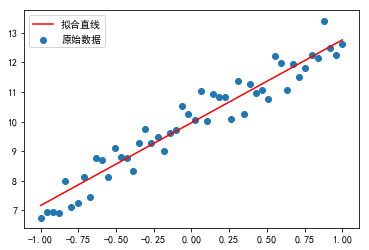

In [38]:
model.eval()
y_hat = model(x)
plt.scatter(x.numpy(), y.numpy(), label='原始数据')
plt.plot(x.numpy(), y_hat.detach().numpy(), c='r', label='拟合直线')
# 显示图例
plt.legend() 
plt.show()

查看参数

In [39]:
list(model.named_parameters())

[('fc.weight', Parameter containing:
  tensor([[2.7996]], requires_grad=True)), ('fc.bias', Parameter containing:
  tensor([9.9626], requires_grad=True))]